# 🧠 Computer Vision – Lecture 4.2

# Topic: Face Recognition (Image Based – Identity)

Instructor: Azeem Aslam 
<br>
Duration: 2–3 Hours


## 🎯 What You Will Learn Today

By the end, you will:

* Understand difference between Detection & Recognition
* Encode faces into numerical vectors
* Compare faces to identify someone
* Build a simple face recognition system
* Prepare dataset for multiple identities

> Today we move from "Where is the face?" → "Who is this face?"


# 🔥 VERY IMPORTANT CONCEPT

Face Detection <br>
→ “There is a face here”

Face Recognition <br>
→ “Whose face is this?”

Recognition requires:
<br>
1. Known faces (database)
2. Encoding (face features)
3. Comparison

# 🔹 Step 1 – Install Required Libraries

We will use `face_recognition` library. This library uses deep learning (dlib) internally to detect and recognize faces.

In [ ]:
!pip install face-recognition

**If installation fails (common on Windows):**

### 🔥 STEP 1.1 — Install OFFICIAL CMake (Very Important)

Go here:

👉 [https://cmake.org/download/](https://cmake.org/download/)

Download:

```
Windows x64 Installer (.msi)
```

During installation:

✔ CHECK this box:

```
Add CMake to the system PATH
```

Finish installation.

---

### 🔥 STEP 1.2 — Restart Your PC

Yes. Restart.
PATH will not update without restart.

---

### 🔥 STEP 1.3 — Test CMake

Open normal **Command Prompt** (not Anaconda).

Type:

```
cmake --version
```

If you see version number → GOOD ✅
If error → PATH not added correctly.

---

### 🔥 STEP 1.4 — Now Install dlib Again

Open **Anaconda Prompt**

Run:

In [ ]:
!pip install dlib

Then:

In [ ]:
!pip install face-recognition

Also, we need OpenCV and NumPy:

In [ ]:
!pip install opencv-python numpy matplotlib

# 🔹 Step 2 – Import Libraries

In [1]:
import cv2

In [2]:
import face_recognition

C:\Users\User\anaconda3\Lib\site-packages\face_recognition_models\__init__.py:7: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import resource_filename


In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt

# 🔹 Step 3 – Load Known Face(s)

Put image(s) of known people in your folder. For example: `ahmad.jpg`

In [5]:
# Load image of known person
known_img = face_recognition.load_image_file("ahmad.jpg")

# 🔹 Step 4 – Encode Known Face

Face encoding converts a face into a **128-dimensional vector**, representing unique features.

In [7]:
know_encoding = face_recognition.face_encodings(known_img)[0]

✅ **Tip:** Each person’s face has a unique vector. Multiple people → multiple encodings.

## 🧠 Ye karta kya hai?

Ye line:

👉 **Face ko numbers me convert karti hai**<br>
👉 Ek **128-dimensional vector (array of 128 numbers)** banati hai<br>
👉 Ye vector us insan ki **unique identity** hoti hai<br>

---

## 🎯 Simple Example Samjho

Socho:

* Human face = Photo<br>
* Computer ko photo samajh nahi aati<br>
* Computer ko sirf **numbers** samajh aate hain<br>

To ye function karta kya hai?

Photo ➜ Deep Learning Model ➜ 128 numbers

Example output aisa ho sakta hai:

```
[0.124, -0.223, 0.556, .... 128 values]
```

Har insan ka vector different hota hai.

---

## 📌 Ab line ko thor kar samjho

```python
face_recognition.face_encodings(known_image)
```

Ye:

* Image me face detect karta hai
* Har face ka encoding banata hai
* Ek **list return karta hai**

Agar image me:

* 1 face → list me 1 encoding
* 3 faces → list me 3 encodings

---

## ❓ `[0]` kyun lagaya?

Because:

```python
face_recognition.face_encodings()
```

list return karta hai.

Example:

```python
[ encoding1 ]
```

Is liye `[0]` likh kar hum pehla face nikal rahe hain.

---

## 📦 Real World Flow

### Step 1:

Tum Ahmad ki photo load karte ho

### Step 2:

Encoding banate ho

```python
ahmad_encoding = face_recognition.face_encodings(image)[0]
```

### Step 3:

Live camera se kisi ka face detect karte ho

### Step 4:

Compare karte ho:

```python
face_recognition.compare_faces([ahmad_encoding], unknown_encoding)
```

Agar match mil gaya → same person 🎉

---

## 🧬 128-Dimensional Vector kya hota hai?

Mathematically:

```
[ x1, x2, x3, .... x128 ]
```

Ye values represent karti hain:

* Nose shape
* Eye distance
* Jaw structure
* Face geometry
* Texture patterns

Deep learning model trained hota hai millions faces par.

---

## ⚡ Important Notes

✔ Har insan ka encoding unique hota hai<br>
✔ Same person ki 2 images → similar encoding<br>
✔ Different person → different encoding<br>

---

## 🔥 Mini Visual Flow

Image

⬇

Face Detection

⬇

Feature Extraction

⬇

128 Numbers

⬇

Compare

# 🔹 Step 5 – Load Test Image

In [8]:
test_img = face_recognition.load_image_file("group_pic.jpg")

# 🔹 Step 6 – Detect Faces in Test Image


In [9]:
face_locations = face_recognition.face_locations(test_img)

* `face_locations` → list of (top, right, bottom, left) coordinates


🔹 Ye line image (`test_img`) me jitne bhi faces hain unki **location (coordinates)** detect karti hai.

🔹 Output kya hota hai?
Ek list of tuples:

```
[(top, right, bottom, left)]
```

🔹 Matlab:
Computer batata hai face image me **kahan par hai** (bounding box position).

---

📌 Simple words:
👉 Ye line image me faces ko detect karke unka **box position** store karti hai.


In [10]:
face_encodings = face_recognition.face_encodings(test_img , face_locations)

* `face_encodings` → list of 128D vectors

🔹 Ye line detected faces (jo `face_locations` me mile thay) ko **128-dimensional vectors** me convert karti hai.

🔹 Matlab:
Image me jitne faces detect hue, un sab ka **encoding (unique numeric identity)** ban jayega.


📌 Simple words:<br>
- Ye line har detected face ko numbers (128 values) me convert karti hai taake baad me compare kiya ja sake.


# 🔹 Step 7 – Compare Faces
✅ This draws a green rectangle and writes the person’s name.

In [12]:
for (top , right , bottom , left) , face_encoding in zip(face_locations , face_encodings):

    matches = face_recognition.compare_faces([know_encoding] , face_encoding)
    name = "Unknown"

    if True in matches:
        name = "Rehman Ahmad"

    cv2.rectangle(test_img , (left , top) , (right , bottom) , (0, 255, 123) , 3)
    cv2.putText(test_img , name , (left , top-10) , cv2.FONT_HERSHEY_SIMPLEX , 0.8 , (0,255,255) ,3)



## 🧠 Pehli Line Samjho (for loop)

```python
for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):
```

Yahan 2 cheezein ek saath chal rahi hain:

* `face_locations` → face ke box coordinates
* `face_encodings` → us face ka 128-number vector

`zip()` dono lists ko pair bana deta hai.

### Example:

Agar image me 2 faces hain:

```
face_locations = [(10,50,60,0), (100,150,160,90)]
face_encodings = [enc1, enc2]
```

To loop aise chalega:

1st iteration:

* box = (10,50,60,0)
* encoding = enc1

2nd iteration:

* box = (100,150,160,90)
* encoding = enc2

Matlab:
👉 Har face ka location + uska encoding ek saath mil raha hai.


# 🔹 Step 8 – Show the Result

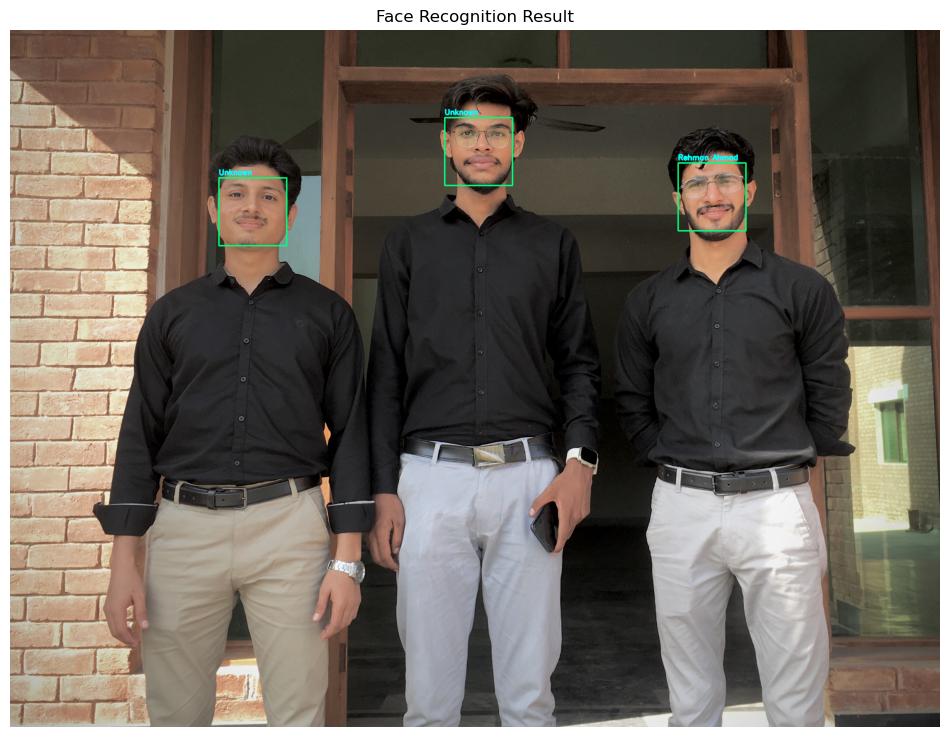

In [13]:
plt.figure(figsize=(12,20))
plt.imshow(test_img)
plt.axis("off")
plt.title("Face Recognition Result")
plt.show()

# 🔹 Step 9 – Save output

In [14]:
import os

In [15]:
if test_img is not None:
    out_dir = "face_recognition_results"

    os.makedirs(out_dir , exist_ok=True)

    test_img = cv2.cvtColor(test_img , cv2.COLOR_RGB2BGR)
    cv2.imwrite(os.path.join(out_dir,"one_preson_face_recognition.jpg"), test_img)
    

    print("Saved outputs in folder : " , out_dir)

Saved outputs in folder :  face_recognition_results


# 🔹 Step 10 – Multiple Known People

* You can encode multiple known faces:

In [16]:
known_face_encodings = []
known_face_names = []

In [18]:
img_1 = face_recognition.load_image_file("ahmad.jpg")
known_face_encodings.append(face_recognition.face_encodings(img_1)[0])
known_face_names.append("Rehman Ahmad")

In [19]:
img_2 = face_recognition.load_image_file("yousaf.jpeg")
known_face_encodings.append(face_recognition.face_encodings(img_2)[0])
known_face_names.append("Muhammad Yousaf")

In [20]:
test_img_2 = face_recognition.load_image_file("group_pic.jpg")

face_locations = face_recognition.face_locations(test_img_2)
face_encodings = face_recognition.face_encodings(test_img_2 , face_locations)

In [21]:
for (top , right , bottom , left) , face_encoding in zip(face_locations , face_encodings):

    matches = face_recognition.compare_faces(known_face_encodings , face_encoding)
    name = "Unknown" 

    if True in matches:
        match_index = matches.index(True)
        name = known_face_names[match_index]

    cv2.rectangle(test_img_2 , (left , top) , (right , bottom) , (255,0, 255) , 2)
    cv2.putText(test_img_2 , name , (left , top-10) , cv2.FONT_HERSHEY_SIMPLEX , 1 ,(0,0, 255) , 2)


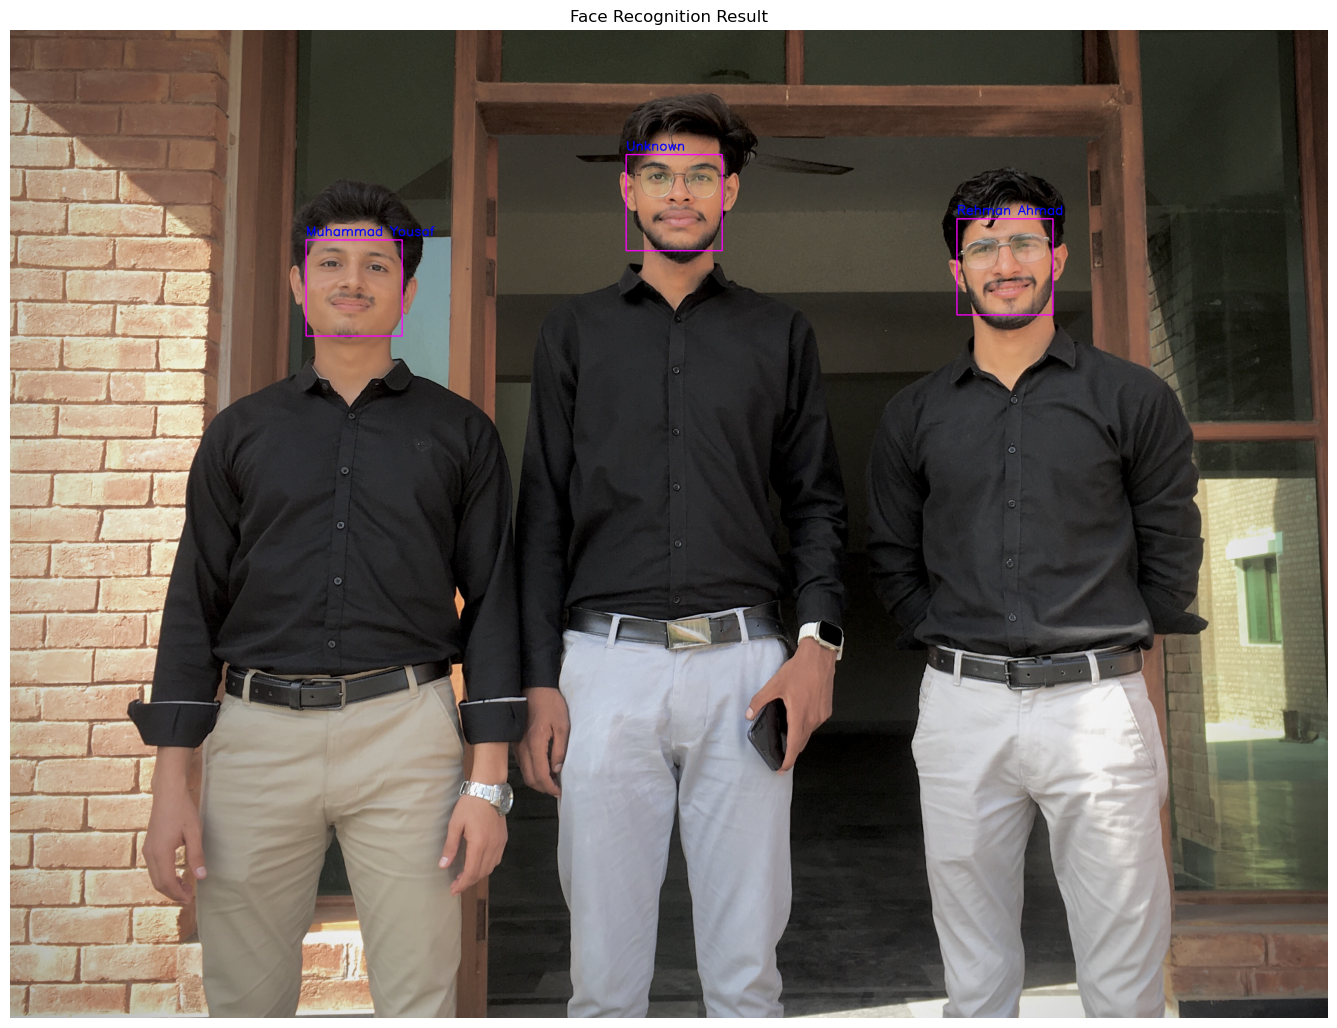

In [23]:
plt.figure(figsize=(17,20))
plt.imshow(test_img_2)
plt.axis("off")
plt.title("Face Recognition Result")
plt.show()

In [24]:
if test_img_2 is not None:
    out_dir = "face_recognition_results"

    os.makedirs(out_dir , exist_ok=True)

    test_img_2 = cv2.cvtColor(test_img_2, cv2.COLOR_RGB2BGR)
    
    cv2.imwrite(os.path.join(out_dir,"Ahmad&Yousaf_face_recognition.jpg"), test_img_2)
    

    print("Saved outputs in folder : " , out_dir)

Saved outputs in folder :  face_recognition_results


# 🧠 Important Notes for Students

* Face **encoding** = unique numerical fingerprint
* Recognition = comparing new face to known encodings
* Works well if images are clear and front-facing
* Poor lighting or angles → may not match

# 🧪 Mini Practice (5–10 mins)

1. Add more known people to the list
2. Test on different group images
3. Change box color or thickness in OpenCV rectangle
4. Try `face_recognition.face_distance()` to see similarity score


In [25]:
# Step 1: Load known faces
known_face_encodings = []
known_face_names = []

In [26]:
img_1 = face_recognition.load_image_file("ahmad.jpg")
known_face_encodings.append(face_recognition.face_encodings(img_1)[0])
known_face_names.append("Ahmad")

In [27]:
img_2 = face_recognition.load_image_file("yousaf.jpeg")
known_face_encodings.append(face_recognition.face_encodings(img_2)[0])
known_face_names.append("Yousaf")

In [28]:
img_3 = face_recognition.load_image_file("hussnain.jpeg")
known_face_encodings.append(face_recognition.face_encodings(img_3)[0])
known_face_names.append("Hussnain")

In [29]:
img_4 = face_recognition.load_image_file("ahsan.jpeg")
known_face_encodings.append(face_recognition.face_encodings(img_4)[0])
known_face_names.append("Ahsan")

In [30]:
# Step 2: Load the test image
test_img_3 = face_recognition.load_image_file("group_pics.jpeg")

# Step 3: Detect faces in the test image
face_locations = face_recognition.face_locations(test_img_3)

face_encodings = face_recognition.face_encodings(test_img_3 , face_locations)

In [31]:
# Step 4: Loop through each detected face
for (top , right , bottom , left) , face_encoding in zip(face_locations , face_encodings):
    # Calculate distance from known faces
    distances = face_recognition.face_distance(known_face_encodings , face_encoding)

    # Find the best match (lowest distance)
    best_match_index = distances.argmin() # index of the closest face
    if distances[best_match_index] < 0.5:   # threshold
        name = known_face_names[best_match_index]  
    else:
        name = "Uknown"

    #Draw rectangle & name on image
    cv2.rectangle(test_img_3, (left, top), (right, bottom), (0, 255, 0), 2)
    cv2.putText(test_img_3, name, (left, top - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 0, 0), 2)

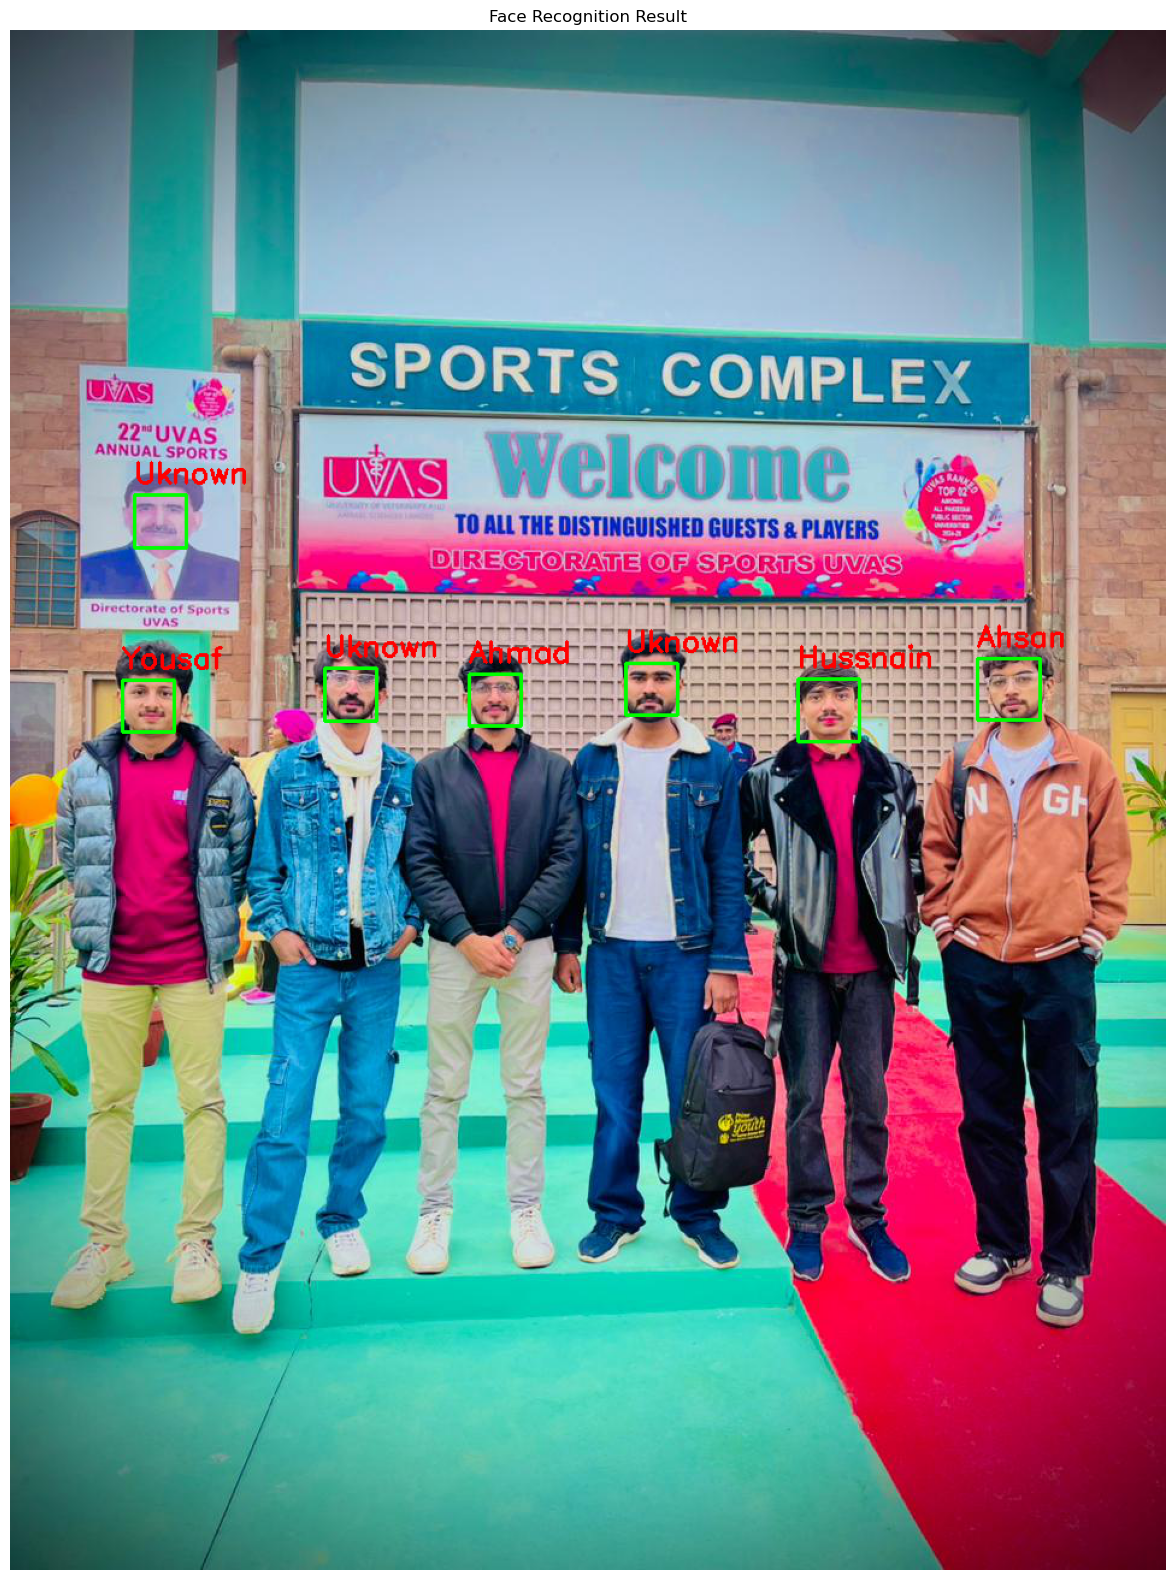

In [33]:
#Show the result
plt.figure(figsize=(17,20))
plt.imshow(test_img_3)
plt.axis("off")
plt.title("Face Recognition Result")
plt.show()

In [34]:
if test_img_3 is not None:
    out_dir = "face_recognition_results"

    os.makedirs(out_dir , exist_ok=True)

    test_img_3 = cv2.cvtColor(test_img_3, cv2.COLOR_RGB2BGR)
    
    cv2.imwrite(os.path.join(out_dir,"Ahmad&Yousaf&Hussnain&Ahsan_face_recognition.jpg"), test_img_3)
    

    print("Saved outputs in folder : " , out_dir)

Saved outputs in folder :  face_recognition_results


# ✅ Summary 

* Face Recognition = “Whose face is this?”
* Use `face_recognition` library
* Encoding = 128D vector
* Compare new faces with known encodings
* Works on images → Live version in next lecture